In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('inflation_corruption_1995_2023_Ruben_Valverde.csv')
df.head()

,country,iso,region,inflation_2023,score_2023,rank_2023,inflation_2022,score_2022,rank_2022,inflation_2021,...,rank_1998,inflation_1997,score_1997,rank_1997,inflation_1996,score_1996,rank_1996,inflation_1995,score_1995,rank_1995
0,Afghanistan,AFG,AP,no data,20.0,162.0,10.6,24.0,150.0,7.8,...,NaN,no data,NaN,NaN,no data,NaN,NaN,no data,NaN,NaN
1,Albania,ALB,ECA,4.8,37.0,98.0,6.7,36.0,101.0,2,...,NaN,33.2,NaN,NaN,12.7,NaN,NaN,7.8,NaN,NaN
2,Algeria,DZA,MENA,9.3,36.0,104.0,9.3,33.0,116.0,7.2,...,NaN,5.7,NaN,NaN,18.7,NaN,NaN,29.8,NaN,NaN
3,Angola,AGO,SSA,13.6,33.0,121.0,21.4,33.0,116.0,25.8,...,NaN,221.5,NaN,NaN,4146,NaN,NaN,2672.2,NaN,NaN
4,Argentina,ARG,AME,133.5,37.0,98.0,72.4,38.0,94.0,48.4,...,61.0,no data,2.81,42.0,no data,3.41,35.0,no data,5.24,24.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 90 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         177 non-null    object 
 1   iso             177 non-null    object 
 2   region          177 non-null    object 
 3   inflation_2023  177 non-null    object 
 4   score_2023      177 non-null    float64
 5   rank_2023       177 non-null    float64
 6   inflation_2022  177 non-null    object 
 7   score_2022      177 non-null    float64
 8   rank_2022       177 non-null    float64
 9   inflation_2021  177 non-null    object 
 10  score_2021      177 non-null    float64
 11  rank_2021       177 non-null    float64
 12  inflation_2020  177 non-null    object 
 13  score_2020      176 non-null    float64
 14  rank_2020       176 non-null    float64
 15  inflation_2019  177 non-null    object 
 16  score_2019      176 non-null    float64
 17  rank_2019       176 non-null    flo

In [4]:
# Contar valores 'no data' en cada columna
inflation = df.filter(like='inflation')
no_data_count = (inflation == 'no data').sum()
print(no_data_count)
print('-------------------')
print('Total:', no_data_count.sum())

inflation_2023     5
inflation_2022     2
inflation_2021     2
inflation_2020     2
inflation_2019     1
inflation_2018     1
inflation_2017     1
inflation_2016     2
inflation_2015     2
inflation_2014     2
inflation_2013     2
inflation_2012     3
inflation_2011     4
inflation_2010     3
inflation_2009     3
inflation_2008     3
inflation_2007     3
inflation_2006     3
inflation_2005     3
inflation_2004     4
inflation_2003     4
inflation_2002     4
inflation_2001     5
inflation_2000     7
inflation_1999     8
inflation_1998     9
inflation_1997    11
inflation_1996    13
inflation_1995    16
dtype: int64
-------------------
Total: 128


In [5]:
# Reemplazar los valores 'no data' por -100 en todo el DataFrame porque da problemas al conte
df.replace('no data', None, inplace=True)

In [6]:
# Convertir las columnas de inflación de 1995 a 2023 a valores numéricos
for year in range(1995,2024):
    column = 'inflation_' + str(year)
    df[column] = pd.to_numeric(df[column]) 

In [7]:
# Contar y mostrar el número de valores nulos por columna
print(df.isnull().sum())
print('------------------------------')
print('Hay un total de ' + str(df.isnull().sum().sum()) + ' valores nulos')

country             0
iso                 0
region              0
inflation_2023      5
score_2023          0
                 ... 
score_1996        126
rank_1996         126
inflation_1995     16
score_1995        139
rank_1995         139
Length: 90, dtype: int64
------------------------------
Hay un total de 2152 valores nulos


In [8]:
# Transformar el DataFrame de formato ancho a formato largo para poder analizar los datos de inflación, puntuación y rango a lo largo del tiempo posteriormente

# Variables:
    # id_vars: columnas que se mantendrán como identificadores
    # value_vars: columnas que se derretirán (inflación, puntuación y rango para cada año)
    # var_name: nombre de la columna que contendrá los nombres de las variables derretidas
    # value_name: nombre de la columna que contendrá los valores de las variables derretidas

df_melted = pd.melt(df, id_vars=['country', 'iso', 'region'], 
                    value_vars=[col for col in df.columns if 'inflation_' in col or 'score_' in col or 'rank_' in col],
                    var_name='variable', value_name='value')

# Extraer el año de la columna 'variable' y convertirlo a entero
df_melted['year'] = df_melted['variable'].str.extract('(\d{4})').astype(int)

# Eliminar el año de la columna 'variable'
df_melted['variable'] = df_melted['variable'].str.replace(r'_\d{4}', '', regex=True)

# Pivotar el DataFrame para tener una columna por cada variable (inflación, puntuación, rango)
df_melted = df_melted.pivot_table(index=['country', 'iso', 'region', 'year'], 
                                  columns='variable', values='value').reset_index()

# Mostrar las primeras filas del DataFrame transformado
df_melted.head()

variable,country,iso,region,year,inflation,rank,score
0,Afghanistan,AFG,AP,2002,5.1,NaN,NaN
1,Afghanistan,AFG,AP,2003,35.7,NaN,NaN
2,Afghanistan,AFG,AP,2004,16.4,NaN,NaN
3,Afghanistan,AFG,AP,2005,10.6,117.0,2.5
4,Afghanistan,AFG,AP,2006,6.8,NaN,NaN


In [9]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4877 entries, 0 to 4876
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    4877 non-null   object 
 1   iso        4877 non-null   object 
 2   region     4877 non-null   object 
 3   year       4877 non-null   int32  
 4   inflation  4831 non-null   float64
 5   rank       3968 non-null   float64
 6   score      3968 non-null   float64
dtypes: float64(3), int32(1), object(3)
memory usage: 247.8+ KB


In [10]:
# Convertir las columnas 'inflation', 'rank' y 'score' a tipo float en el DataFrame df_melted
df_melted[['inflation', 'rank', 'score']] = df_melted[['inflation', 'rank', 'score']].astype(float)

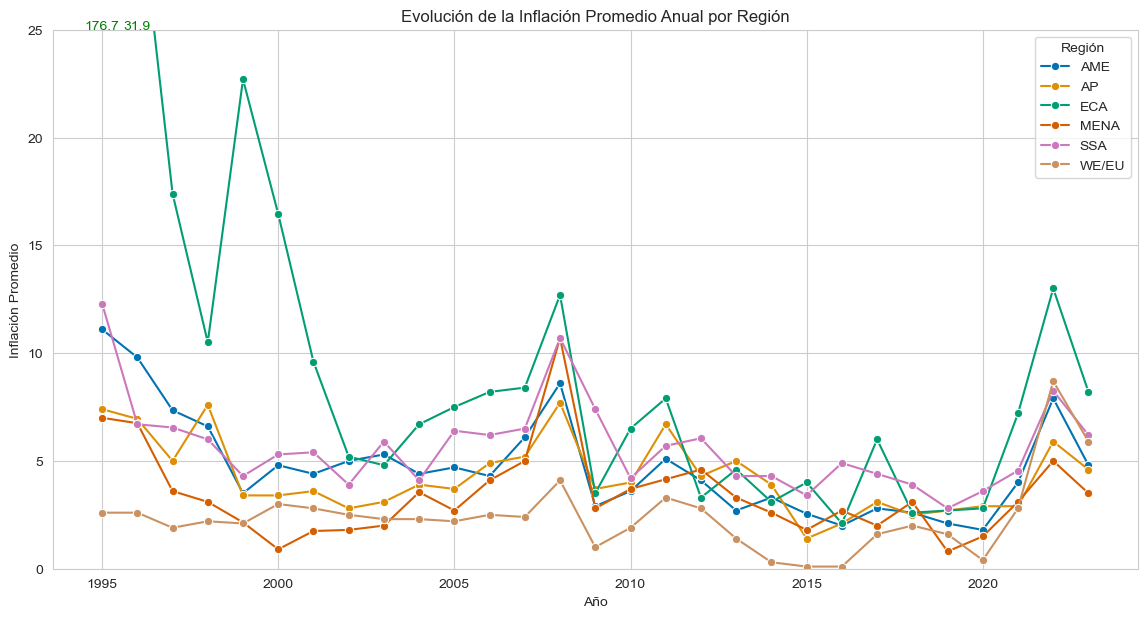

In [11]:
# Crear un DataFrame con la inflación promedio anual por región
df_avg_inflation = df_melted.groupby(['region', 'year'])['inflation'].median().reset_index()

# Nota: Se utilizó la mediana en lugar del promedio para evitar que valores extremos afecten el resultado (Como la inflación de 1995 en Europa Oriental y Asia Central causada por bulgaria y Venezuela en America)

# Fijo el estilo de los gráficos
sns.set_style('whitegrid')
sns.set_palette('colorblind')

# Crear el lineplot
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_avg_inflation, x='year', y='inflation', hue='region', marker='o')


# Debido a que la región de Europa Oriental y Asia Central (ECA) empiezan con una mediana de inflación de 176.7 en 1995, se limito el eje 'y' a 25% de inflación para que el gráfico sea más legible.

# Limitar el eje y en el valor de 25 
plt.ylim(0,25)

# Anotar los valores que sobresalgan de 25
for region in df_avg_inflation['region'].unique():

    # Filtrar los datos para la región actual
    region_data = df_avg_inflation[df_avg_inflation['region'] == region]
    for index, row in region_data.iterrows():

        # Si la inflación es mayor a 25, anotar el valor en el gráfico
        if row['inflation'] > 25:
            plt.text(row['year'], 25, f'{row["inflation"]:.1f}', color='green', ha='center', fontsize=10)

# Añadir títulos y etiquetas
plt.title('Evolución de la Inflación Promedio Anual por Región')
plt.xlabel('Año')
plt.ylabel('Inflación Promedio')
plt.legend(title='Región')
plt.show()

### Análisis del Gráfico de Evolución de la Inflación Promedio Anual por Región

El gráfico muestra la evolución de la inflación promedio anual por región desde 1995 hasta 2023. A continuación, se presentan algunos puntos clave observados en el gráfico:

1. **América (AME)**:
    - Se observa una tendencia general a la baja en la inflación desde 1995 hasta principios de la década de 2000.
    - Sin embargo, hay picos significativos en ciertos años, lo que indica episodios de alta inflación en algunos países de la región.
    - En los últimos años, la inflación ha vuelto a aumentar, alcanzando niveles preocupantes.

2. **África Subsahariana (SSA)**:
    - La región muestra una tendencia similar a la de Latinoamérica, con una disminución de la inflación en la primera década del siglo XXI.
    - A partir de 2010, la inflación ha mostrado una tendencia al alza, con picos notables en algunos años.

3. **Asia-Pacífico (AP)**:
    - La región ha mantenido una inflación relativamente baja y estable en comparación con otras regiones.
    - Aunque hay algunos picos, la inflación en Asia-Pacífico ha sido más controlada.

4. **Europa Occidental y Union Europea (WE/EU)**:
    - Esta región ha experimentado una inflación muy baja y estable durante la mayor parte del período analizado.
    - Sin embargo, en los últimos años se observa un aumento en la inflación, esto es debido al aumento maviso de la masa monetaria para superar la crisis del covid en un corto periodo de tiempo.

5. **Medio Oriente y Norte de África (MENA)**:
    - La región muestra una inflación relativamente alta en comparación con Europa y Asia-Pacífico.
    - Hay fluctuaciones significativas en la inflación, lo que indica inestabilidad económica en algunos países de la región.

6. **Europa Oriental y Asia Central (ECA)**:
    - La región de ECA muestra una tendencia fluctuante en la inflación a lo largo de los años.
    - Aunque algunos países han logrado mantener una inflación baja y estable, otros continúan enfrentando episodios de alta inflación.


In [12]:
# Al ejecutar el gráfico previamente se podia observar que el formato del CPI cambió en 2012, siendo 100 la puntuación máxima en lugar de 10.
df_melted[df_melted['year'].isin([2010, 2011, 2012, 2013])].groupby(['region', 'year']).agg({'score': 'mean'}).head(8)

variable         score
region year           
AME    2010   4.037500
       2011   4.214286
       2012  45.214286
       2013  44.571429
AP     2010   4.021429
       2011   4.092857
       2012  43.760000
       2013  44.080000

In [13]:
# Multiplico por 10 el CPI de los años 1995 hasta 2011 para que estén en la misma escala que los años posteriores
df_melted.loc[df_melted['year'].between(1995, 2011), 'score'] *= 10

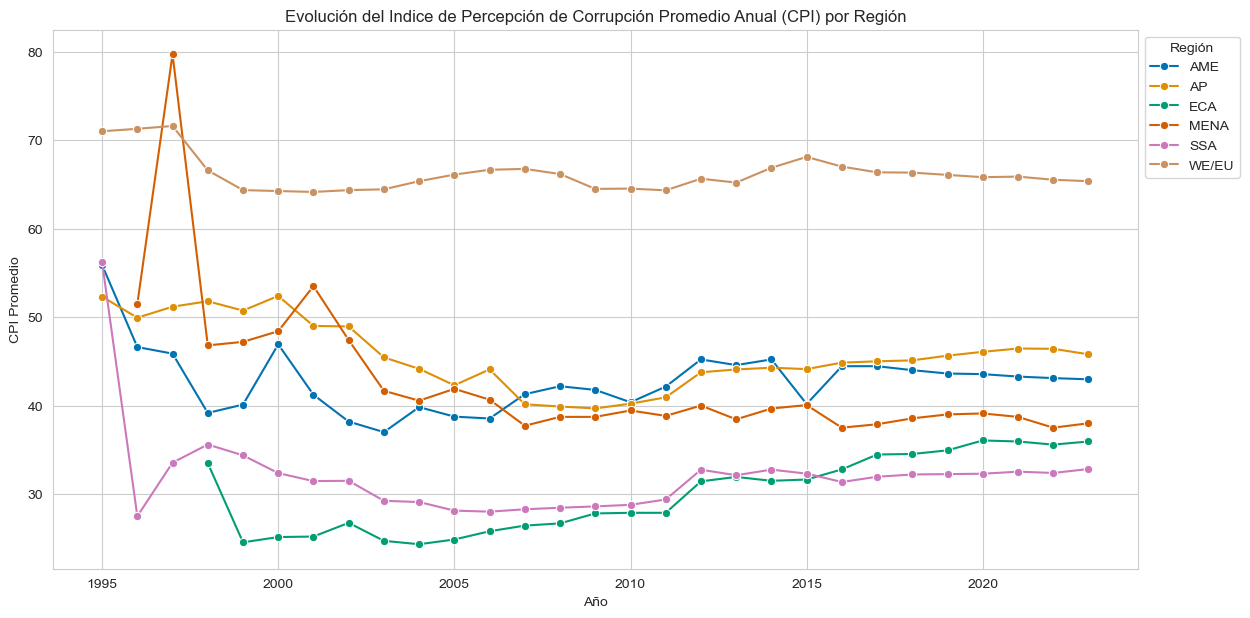

In [14]:
# Calcular el CPI promedio anual por región
df_avg_score = df_melted.groupby(['region', 'year'])['score'].mean().reset_index()

# Convertir la columna de score (CPI) a numérica
df_avg_score['score'] = pd.to_numeric(df_avg_score['score'])

# Crear el lineplot
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_avg_score, x='year', y='score', hue='region', marker='o')

# Añadir títulos y etiquetas
plt.title('Evolución del Indice de Percepción de Corrupción Promedio Anual (CPI) por Región')
plt.xlabel('Año')
plt.ylabel('CPI Promedio')
plt.legend(title='Región')
plt.legend(title='Región', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

### Análisis del Gráfico de Evolución de la Puntuación de Corrupción Promedio Anual por Región

El gráfico muestra la evolución de la puntuación de corrupción promedio anual por región desde 1995 hasta 2023. A continuación, se presentan algunos puntos clave observados en el gráfico:

1. **América (AME)**:
    - La puntuación de corrupción en Latinoamérica ha mostrado una tendencia fluctuante a lo largo de los años.
    - Aunque hay años en los que se observa una mejora en la puntuación, la región sigue enfrentando desafíos significativos en términos de corrupción.

2. **África Subsahariana (SSA)**:
    - La región de África Subsahariana muestra una tendencia similar a la de Latinoamérica, con puntuaciones de corrupción que varían considerablemente a lo largo del tiempo.
    - A pesar de algunos avances, la corrupción sigue siendo un problema persistente en muchos países de la región.

3. **Asia-Pacífico (AP)**:
    - La región de Asia-Pacífico ha mantenido una puntuación de corrupción relativamente estable en comparación con otras regiones.
    - Aunque hay algunos picos y valles, la puntuación de corrupción en Asia-Pacífico ha sido más controlada.

4. **Europa Occidental y Union Europea (WE/EU)**:
    - Esta región ha experimentado una puntuación de corrupción relativamente baja y estable durante la mayor parte del período analizado.
    - Sin embargo, en los últimos años se observa una ligera disminución en la puntuación, lo que podría indicar un aumento en los desafíos relacionados con la corrupción.

5. **Medio Oriente y Norte de África (MENA)**:
    - La región de MENA muestra una puntuación de corrupción relativamente alta en comparación con Europa y Asia-Pacífico.
    - Hay fluctuaciones significativas en la puntuación, lo que indica inestabilidad en la lucha contra la corrupción en algunos países de la región.
    
6. **Europa Oriental y Asia Central (ECA)**:
    - La región de ECA muestra una tendencia fluctuante en la puntuación de corrupción a lo largo de los años.
    - Aunque algunos países han logrado mejoras significativas, otros continúan enfrentando altos niveles de corrupción.


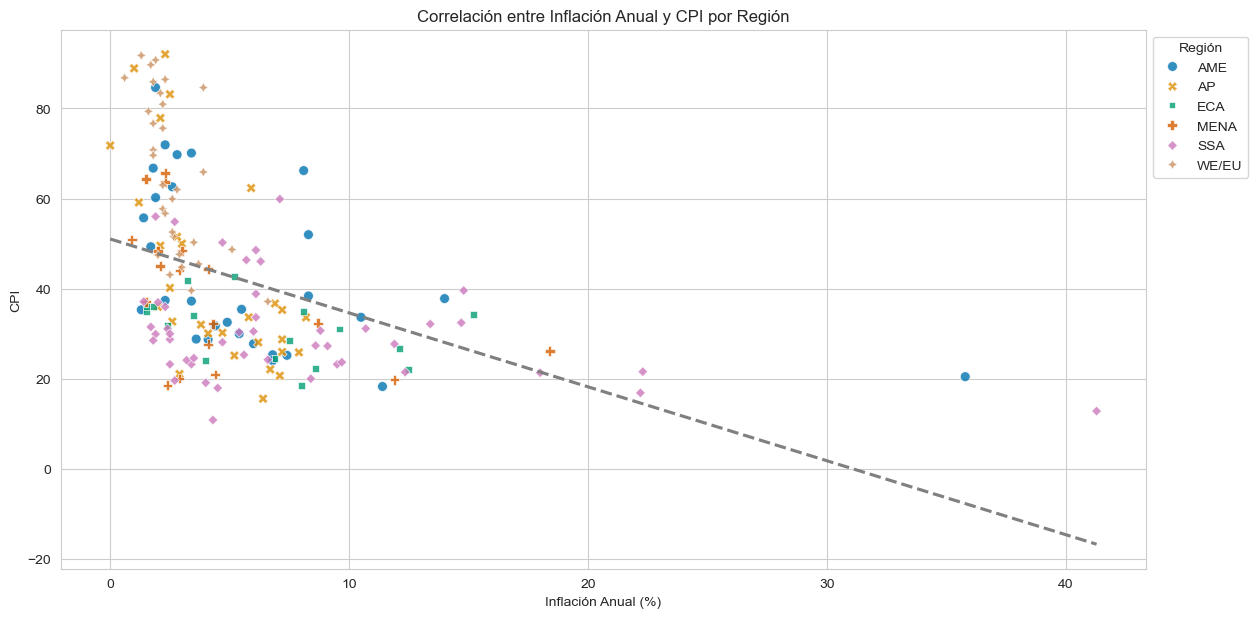

In [15]:
# Calculo los valores medios de inflación y puntuación de corrupción por país
df_avg = df_melted.groupby(['country','region']).agg({'inflation': 'median', 'score': 'mean'}).sort_values(by=['region','country']).reset_index()
 
#Nota1: ordeno por región y país para que el hue siga el mismo orden que el resto
#Nota2: utilizo la mediana para la inflación para evitar que valores extremos como los de Bulgaria y Venezuela ya mencionados.

# Crear el scatter plot para visualizar la correlación entre inflación y puntuación de corrupción
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_avg, x='inflation', y='score', hue='region', style='region', markers=True, alpha=0.8, s=50)

# Añadir una línea de tendencia
sns.regplot(data=df_avg, x='inflation', y='score', scatter=False, color='gray', line_kws={'linestyle':'dashed'}, ci=None)

# Añadir títulos y etiquetas
plt.title('Correlación entre Inflación Anual y CPI por Región')
plt.xlabel('Inflación Anual (%)')
plt.ylabel('CPI')
plt.legend(title='Región', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

### Análisis de la Correlación entre la Puntuación de Corrupción y la Inflación

El scatterplot muestra la relación entre la inflación y la puntuación de corrupción promedio por país. A continuación, se presentan algunos puntos clave observados en el gráfico:

1. **Tendencia General**:
    - Existe una tendencia negativa entre la inflación y la puntuación de corrupción. Esto sugiere que a medida que aumenta la inflación, la puntuación de corrupción tiende a disminuir, indicando mayores niveles de corrupción.

2. **Regiones con Alta Inflación**:
    - Las regiones como Latinoamérica (AME) y África Subsahariana (SSA) muestran una mayor dispersión en los valores de inflación, con algunos países experimentando inflaciones extremadamente altas. Estos países también tienden a tener puntuaciones de corrupción más bajas, lo que indica altos niveles de corrupción.

3. **Regiones con Baja Inflación**:
    - Europa Occidental y Estados Unidos (WE/EU) y Asia-Pacífico (AP) muestran inflaciones relativamente bajas y puntuaciones de corrupción más altas, lo que indica menores niveles de corrupción. Esto sugiere una mejor gestión económica y políticas más efectivas contra la corrupción en estas regiones.

4. **Línea de Tendencia**:
    - La línea de tendencia discontinua en el gráfico refuerza la relación negativa entre la inflación y la puntuación de corrupción. Aunque hay excepciones, la mayoría de los puntos siguen esta tendencia.

5. **Valores Atípicos**:
    - Se eliminaron los valores atípicos de inflación (percentil 95) para obtener una representación más clara de la tendencia general. Los valores extremadamente altos de inflación empeoraban la visualización de la relación entre las variables.

En resumen, el gráfico sugiere que existe una correlación negativa entre la inflación y la puntuación de corrupción. Las regiones con alta inflación tienden a tener mayores niveles de corrupción, mientras que las regiones con baja inflación muestran menores niveles de corrupción. Este análisis destaca la importancia de la estabilidad económica y la buena gobernanza en la retención del poder adquisitivo de la moneda.

In [16]:
# Importar la función spearmanr del módulo stats de scipy
# Nota: Eligo este test porque no asume que las variables siguen una distribución normal
from scipy.stats import spearmanr

# Definir el nivel de significancia
alpha = 0.05

# Calcular el coeficiente de correlación de Spearman
corr, p_value = spearmanr(df_melted['inflation'], df_melted['score'], nan_policy='omit')

# Mostrar los resultados
print(f"Coeficiente de Correlación de Spearman's Rank: {corr}")
if p_value < alpha:
    print(f"p-valor: {p_value}, Se rechaza la hipótesis nula")
else: 
    print(f"p-valor: {p_value}, No se rechaza la hipótesis nula")

Coeficiente de Correlación de Spearman's Rank: -0.42815685680958204
p-valor: 1.249441793588557e-174, Se rechaza la hipótesis nula



### Resultado del Coeficiente de Correlación de Spearman's Rank

El Coeficiente de Correlación de Spearman's Rank calculado entre las columnas `inflation` y `score` ha arrojado los siguientes resultados:

- **Coeficiente de Correlación de Spearman's Rank**: -0.428
- **p-valor**: 1.249e-174

#### Interpretación:

1. **Coeficiente de Correlación**:
    - El valor del coeficiente de correlación de Spearman es -0.428, lo que indica una correlación negativa moderada entre la inflación y la puntuación de corrupción. Esto sugiere que, en general, a medida que aumenta la inflación, la puntuación de corrupción tiende a disminuir, lo que indica mayores niveles de corrupción.

2. **p-valor**:
    - El p-valor obtenido es extremadamente bajo (1.249e-174), lo que es mucho menor que el nivel de significancia comúnmente utilizado (α = 0.05). Esto significa que podemos rechazar la hipótesis nula de que no existe correlación entre la inflación y la puntuación de corrupción. En otras palabras, la correlación observada es estadísticamente significativa.

En resumen, los resultados del Coeficiente de Correlación de Spearman's Rank sugieren que existe una correlación negativa significativa entre la inflación y la puntuación de corrupción en los datos analizados.
